In [4]:
#Hasna Ben Jillali
##04/22/2024

In [5]:
import pandas as pd
#looding data from the file
dataSet = pd.read_csv('police.csv')
dataSet.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [10]:
# Create a pivot table to count each outcome for each racial group
outcome_table = pd.pivot_table(dataSet, index='driver_race', columns='stop_outcome',aggfunc='count')
dataSet.groupby(["driver_race"])
# Display the outcome table
print(outcome_table)

               county_name                                                   \
stop_outcome Arrest Driver Arrest Passenger Citation  N/D No Action Warning   
driver_race                                                                   
Asian                  0.0              0.0      0.0  0.0       0.0     0.0   
Black                  0.0              0.0      0.0  0.0       0.0     0.0   
Hispanic               0.0              0.0      0.0  0.0       0.0     0.0   
Other                  0.0              NaN      0.0  0.0       0.0     0.0   
White                  0.0              0.0      0.0  0.0       0.0     0.0   

                  district                                   ... violation  \
stop_outcome Arrest Driver Arrest Passenger Citation    N/D  ...  Citation   
driver_race                                                  ...             
Asian                 42.0              4.0   2206.0   10.0  ...    2206.0   
Black                667.0            102.0  10531.0  1

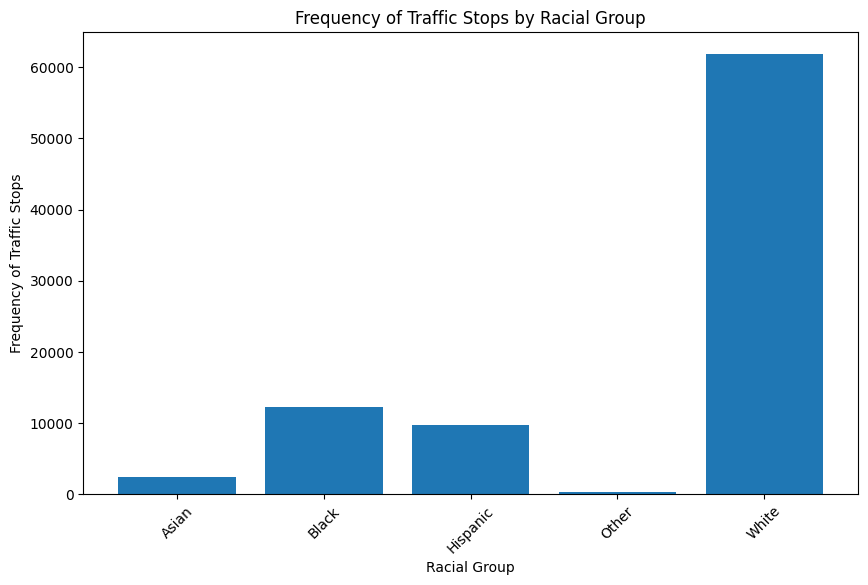

In [14]:
import matplotlib.pyplot as plt
# Count the frequency of traffic stops for each racial group
stop_frequency = dataSet.groupby('driver_race').size()
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(stop_frequency.index, stop_frequency.values)
plt.title('Frequency of Traffic Stops by Racial Group')
plt.xlabel('Racial Group')
plt.ylabel('Frequency of Traffic Stops')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.show()


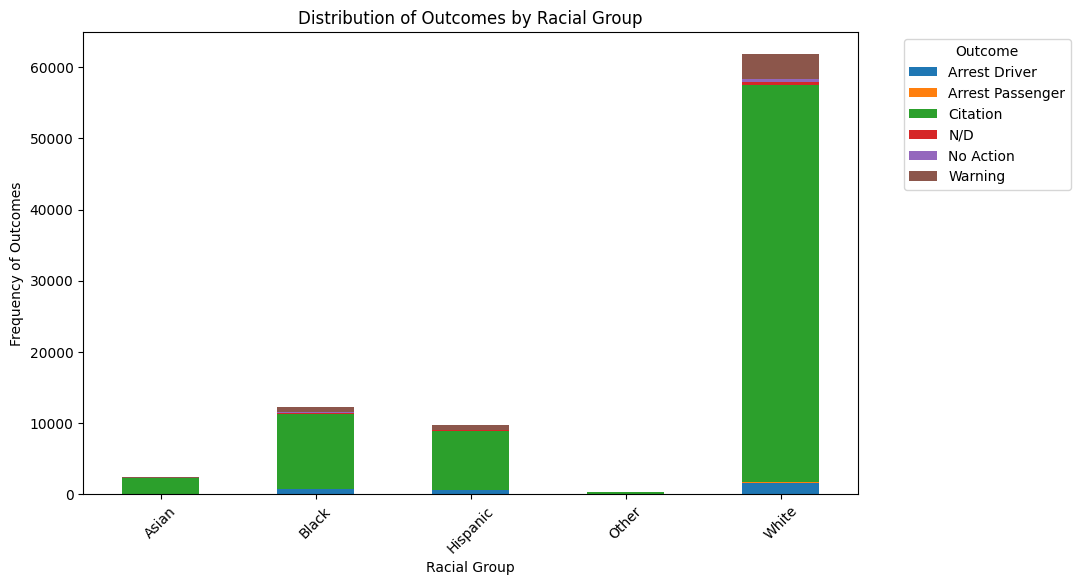

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
#looding data from the file
dataSet = pd.read_csv('police.csv')
dataSet.head()
#get rid of the nan values
getRidOfNaN = dataSet.dropna(subset=['driver_race', 'stop_outcome'])
# Group the cleaned data by 'driver_race' and 'stop_outcome' and count the 
grouped = getRidOfNaN.groupby(['driver_race', 'stop_outcome']).size().unstack()
# Plot the bar chart
grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Outcomes by Racial Group')
plt.xlabel('Racial Group')
plt.ylabel('Frequency of Outcomes')
plt.legend(title='Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

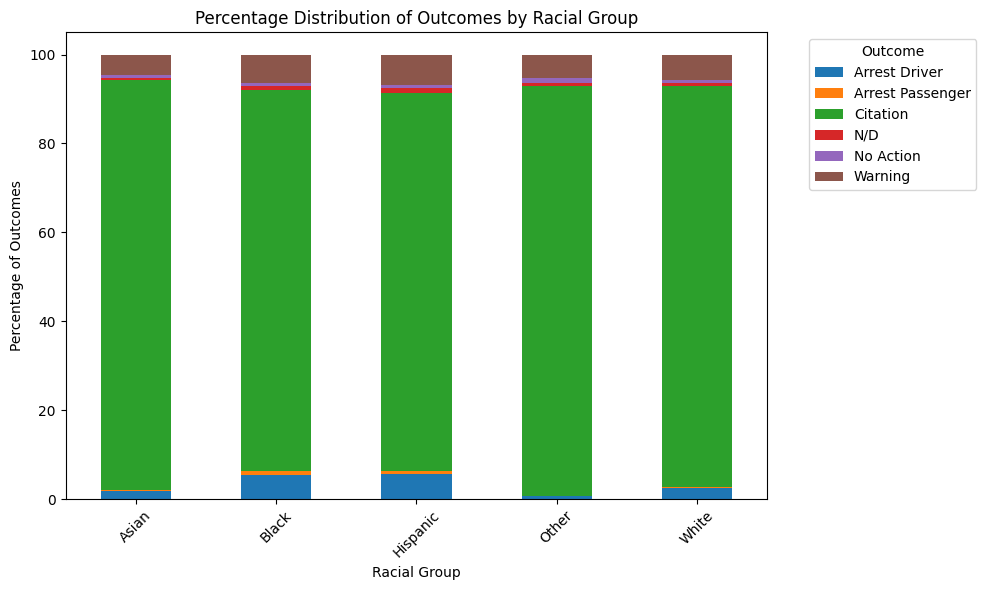

In [21]:
#grouped data by race and outcome
grouped = getRidOfNaN.groupby(['driver_race', 'stop_outcome']).size().unstack()
# Calculate the total number of stops for each racial group
total_stops_by_race = grouped.sum(axis=1)
# Calculate the percentage of each outcome for each racial group based on 
outcome_percentages = grouped.div(total_stops_by_race, axis=0) * 100
# Plot the bar chart
outcome_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Percentage Distribution of Outcomes by Racial Group')
plt.xlabel('Racial Group')
plt.ylabel('Percentage of Outcomes')
plt.legend(title='Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
